# Predator Analysis: BRCA

## Evaluation on _CGC_



<b><i class="fa fa-folder-o" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Location</b><br>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">C:\Users\ibrah\Documents\GitHub\Predicting-Mutation-Effects\src</code>
</p>

<b><i class="far fa-file" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Name</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">PredatorAnalysis_BRCA_CGC.ipynb</code>
</p>

<b><i class="far fa-calendar-alt" area-hidden="true" style="color:#1976D2"> </i>&nbsp; Last Edited</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">September 9th, 2021</code>
</p>


<div class="alert alert-block" style="background-color: #F5F5F5; border: 1px solid; padding: 10px; border-color: #E0E0E0">
    <b><i class="fa fa-compass" aria-hidden="true" style="color:#404040"></i></b>&nbsp; <b style="color: #404040">Purpose </b> <br>
<div>

TBA

In [1]:
from IPython.display import display

In [2]:
# Paths
## SNVs
SNV_COMMON_PATH = "C:/Users/ibrah/Desktop/TUSEB_Study/Data_Collection_and_Filtering/SNV/"
SNV_BRCA_PATH = SNV_COMMON_PATH + "SNV_BRCA_hg38.csv"

## PREDICTIONS_DATASETS
# PREDICTIONS_COMMON_PATH = "../data/predictions_datasets/ML_6_shap_SPSM/"
# PREDICTION_BRCA_PATH = PREDICTIONS_COMMON_PATH + "___.csv"
### PREDICTION_REDUCED_DATASETS

PREDICTIONS_COMMON_PATH = "../data/predictions_datasets/"
# PREDICTION_BRCA_REDUCED_PATH = PREDICTIONS_COMMON_PATH + "predictions_uh_2021-09-07.csv"  # temp
PREDICTION_BRCA_REDUCED_PATH = PREDICTIONS_COMMON_PATH + "predictions_n_10_2021-09-08.csv"  # temp
# PREDICTION_BRCA_REDUCED_PATH = PREDICTIONS_COMMON_PATH + "ML_6_shap_SPSM/brca_predicted_reduced_data_shap_top-11_2021-07-27.csv"

## ELASPIC_RESULTS_DATASETS
ELASPIC_RESULTS_COMMON_PATH = "../data/"  # elaspic_results_datasets
BRCA_CORE_PATH = ELASPIC_RESULTS_COMMON_PATH + "BRCA_CORE_A2.txt"
BRCA_INTERFACE_PATH = ELASPIC_RESULTS_COMMON_PATH + "BRCA_INTERFACE_A2.txt"

# CGC GENES
CGC_ALL_PATH = "../data/cgc_genes/all_genes.txt"
CGC_BREAST_PATH = "../data/cgc_genes/breast_genes.txt"

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

In [3]:
from PredatorAnalysis import PredatorAnalysis

In [4]:
predator_analysis = PredatorAnalysis(
    tcga="brca",
    snv_path=SNV_BRCA_PATH,
    prediction_data_path=PREDICTION_BRCA_REDUCED_PATH,
    elaspic_core_path=BRCA_CORE_PATH,
    elaspic_interface_path=BRCA_INTERFACE_PATH,
    reference_data_name="cgc",
    reference_data_spec_cohort_path=CGC_BREAST_PATH,
    reference_data_path=CGC_ALL_PATH
)

2021-09-08 13:34:12 | INFO     | helpers.helpers_analysis.loaders | Loading brca SNV datasets ..
2021-09-08 13:34:16 | DEBUG    | helpers.helpers_analysis.loaders | brca SNV data size: (120988, 121)
2021-09-08 13:34:16 | DEBUG    | helpers.helpers_analysis.loaders | brca SNV data processed size: (60278, 121)
2021-09-08 13:34:16 | INFO     | helpers.helpers_analysis.loaders | brca SNV datasets are loaded.
2021-09-08 13:34:16 | INFO     | helpers.helpers_analysis.loaders | Loading brca PREDICTION dataset ..
2021-09-08 13:34:16 | DEBUG    | helpers.helpers_analysis.loaders | brca PREDICTION data shape: (2448, 4)
2021-09-08 13:34:16 | INFO     | helpers.helpers_analysis.loaders | brca PREDICTION dataset is loaded.
2021-09-08 13:34:16 | INFO     | helpers.helpers_analysis.loaders | Loading brca ELASPIC datasets ..
2021-09-08 13:34:16 | DEBUG    | helpers.helpers_analysis.loaders | Loading ELASPIC CORE data materials ..
2021-09-08 13:34:17 | DEBUG    | helpers.helpers_analysis.loaders | brca

# Datasets

##  1. SNV Datasets

In [5]:
# Original SNV Dataset
print(predator_analysis.data_materials["brca_snv_data"].shape)

(120988, 121)


In [6]:
# Processed SNV Dataset
print(predator_analysis.data_materials["brca_snv_data_processed"].shape)

(60278, 121)


In [7]:
# Simplified SNV Dataset
print(predator_analysis.data_materials["brca_snv_data_simplified"].shape)
predator_analysis.data_materials["brca_snv_data_simplified"].head(3)

(60278, 4)


,Hugo_Symbol,SWISSPROT,HGVSp_Short,Tumor_Sample_Barcode
0,USP24,Q9UPU5,I342V,TCGA-D8-A1XY
1,ERICH3,Q5RHP9,E1406K,TCGA-D8-A1XY
2,SPHKAP,Q2M3C7,R1372S,TCGA-D8-A1XY


## 2. ELASPIC Results Datasets

### 2.1. `Core` Datasets

In [8]:
# Core data 
print(predator_analysis.data_materials["brca_elaspic_core_data"].shape)
predator_analysis.data_materials["brca_elaspic_core_data"].head(3)

(12383, 103)


,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,Domain_clan,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P35367,P35367,M206V,done,core,COSM1484451,-,-,7tm_1,7tm_1,...,458.0,-,-,-,-,-,-,-,-,-
1,Q96RQ3,Q96RQ3,R66H,done,core,COSM1041745,-,-,CPSase_L_chain+CPSase_L_D2+Biotin_carb_C,CPSase_L_chain+CPSase_L_D2+Biotin_carb_C,...,574.0,-,-,-,-,-,-,-,-,-
2,O00203,O00203,R227H,done,core,COSM1438700,-,-,Adaptin_N,Adaptin_N,...,618.0,-,-,-,-,-,-,-,-,-


In [9]:
# Core data simplified
print(predator_analysis.data_materials["brca_elaspic_core_data_simplified"].shape)
predator_analysis.data_materials["brca_elaspic_core_data_simplified"].head(3)

(12383, 3)


,UniProt_ID,Mutation,Interactor_UniProt_ID
0,P35367,M206V,-
1,Q96RQ3,R66H,-
2,O00203,R227H,-


### 2.2 `Interface` Datasets

In [10]:
print(predator_analysis.data_materials["brca_elaspic_interface_data"].shape)
predator_analysis.data_materials["brca_elaspic_interface_data"].head(3)  ## <-- i was here

(4452, 103)


,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,Domain_clan,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,Q9UKS6,Q9UKS6,R24H,done,interface,-,-,-,FCH,FCH,...,571.0,58.4741,57.8248,44.4473,44.4473,1524.89,732.135,2257.02,3.01412,3.16742
1,Q9UKS6,Q9UKS6,R24H,done,interface,-,-,-,FCH,FCH,...,565.0,56.4873,56.3099,69.6442,69.6442,1500.95,795.265,2296.21,3.26366,4.98813
2,Q9UKS6,Q9UKS6,R24H,done,interface,-,-,-,FCH,FCH,...,565.0,62.2267,62.0808,67.3261,67.3261,1555.45,776.3,2331.75,3.55240,4.79224


In [11]:
print(predator_analysis.data_materials["brca_elaspic_interface_processed_data"].shape)
predator_analysis.data_materials["brca_elaspic_interface_processed_data"].head(3)

(2448, 3)


,UniProt_ID,Mutation,Interactor_UniProt_ID
0,Q9UKS6,R24H,Q9BY11
1,Q9UKS6,R24H,Q9UNF0
2,Q9UKS6,R24H,Q5TZC3


### 2.3. ELASPIC `Core` and `Interface` Combined

Combine two dataframes:
+ *brca_elaspic_core_data_simplified*
+ *brca_interface_processed*

In [12]:
print('ELASPIC CORE DATA')
display(predator_analysis.data_materials["brca_elaspic_core_data_simplified"].head(3))
print('Data dimensions:', predator_analysis.data_materials["brca_elaspic_core_data_simplified"].shape)

print('\nELASPIC INTERFACE DATA')
display(predator_analysis.data_materials["brca_elaspic_interface_processed_data"].head(3))
print('Data dimensions:', predator_analysis.data_materials["brca_elaspic_interface_processed_data"].shape)

ELASPIC CORE DATA


,UniProt_ID,Mutation,Interactor_UniProt_ID
0,P35367,M206V,-
1,Q96RQ3,R66H,-
2,O00203,R227H,-


Data dimensions: (12383, 3)

ELASPIC INTERFACE DATA


,UniProt_ID,Mutation,Interactor_UniProt_ID
0,Q9UKS6,R24H,Q9BY11
1,Q9UKS6,R24H,Q9UNF0
2,Q9UKS6,R24H,Q5TZC3


Data dimensions: (2448, 3)


In [13]:
# ELASPIC Core and Interface Combined
print(predator_analysis.data_materials["brca_elaspic_core_and_interface_data"].shape)
predator_analysis.data_materials["brca_elaspic_core_and_interface_data"].head(3)

(14831, 3)


,UniProt_ID,Mutation,Interactor_UniProt_ID
0,P35367,M206V,-
1,Q96RQ3,R66H,-
2,O00203,R227H,-


## 3. Prediction Datasets

**Note**: For now, prediction data contains all the rows in interface data. It is because we used prediction probabilities, hence made a prediction for each row, without reducing any. However, if it is decided to drop some entries due to invalid prediction case, these datasets will not be the same.

In [14]:
print(predator_analysis.data_materials["brca_prediction_data"].shape)
predator_analysis.data_materials["brca_prediction_data"].head(3)

(2448, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Predictions
0,Q9UKS6,R24H,Q9BY11,0
1,Q9UKS6,R24H,Q9UNF0,0
2,Q9UKS6,R24H,Q5TZC3,0


## 4. Reference Data Genes (CGC)

In [15]:
print(len(predator_analysis.data_materials['cgc_brca_genes']))
predator_analysis.data_materials['cgc_brca_genes'][:5]

723


['A1CF', 'ABI1', 'ABL1', 'ABL2', 'ACKR3']

In [16]:
print(len(predator_analysis.data_materials['cgc_all_genes']))
predator_analysis.data_materials['cgc_all_genes'][:5]

36


['RB1', 'ERBB2', 'CDH1', 'SMARCD1', 'NCOR1']

# Prepare Analysis

In [17]:
predator_analysis.prepare_analysis()

2021-09-08 13:34:18 | DEBUG    | PredatorAnalysis | brca_elaspic_proteins loaded.
2021-09-08 13:34:18 | DEBUG    | PredatorAnalysis | Number of proteins in ELASPIC brca: 6859


  0%|          | 0/6859 [00:00<?, ?it/s]

Number of exceptional cases: 17
Exceptional cases: [('A6NI47', []), ('P01889', []), ('P04745', ['AMY1A', 'AMY1C']), ('P04908', ['HIST1H2AB', 'HIST1H2AE']), ('P0C0S8', ['HIST1H2AL', 'HIST1H2AG', 'HIST1H2AK', 'HIST1H2AM', 'HIST1H2AI']), ('P12532', ['CKMT1B', 'CKMT1A']), ('P30480', []), ('P30486', []), ('P62805', ['HIST1H4F', 'HIST1H4H', 'HIST1H4E', 'HIST1H4L', 'HIST1H4J', 'HIST1H4K', 'HIST1H4D', 'HIST4H4', 'HIST1H4B']), ('P62807', ['HIST1H2BC', 'HIST1H2BG', 'HIST1H2BE', 'HIST1H2BF', 'HIST1H2BI']), ('P68431', ['HIST1H3B', 'HIST1H3D', 'HIST1H3F', 'HIST1H3E', 'HIST1H3J', 'HIST1H3A', 'HIST1H3I', 'HIST1H3G', 'HIST1H3C']), ('Q13748', ['TUBA3C', 'TUBA3D']), ('Q29836', []), ('Q31610', []), ('Q31612', []), ('Q5VU13', ['VSIG8', 'C1orf204']), ('Q6S5H5', [])]
2021-09-08 13:35:04 | DEBUG    | PredatorAnalysis | brca_protein_to_gene_dict loaded.


  0%|          | 0/6859 [00:00<?, ?it/s]

0 	 A0AV96 	 0
1 	 A0AVF1 	 0
2 	 A0AVI2 	 0
3 	 A0AVT1 	 9
4 	 A0FGR9 	 0
2021-09-08 13:35:07 | DEBUG    | PredatorAnalysis | brca_protein_to_num_elaspic_interface_entries loaded.


  0%|          | 0/6859 [00:00<?, ?it/s]

0 	 A0AV96 	 0
1 	 A0AVF1 	 0
2 	 A0AVI2 	 0
3 	 A0AVT1 	 7
4 	 A0FGR9 	 0
2021-09-08 13:35:12 | DEBUG    | PredatorAnalysis | brca_protein_to_num_unique_interactors loaded.
2021-09-08 13:35:12 | DEBUG    | PredatorAnalysis | Number of patients in brca: 985.


## 1. Proteins

$\textit{Proteins} = \textit{ELASPIC Results Core Proteins} + \textit{ELASPIC Results Interface Proteins}$

In [18]:
print('Number of proteins in ELASPIC BRCA:', len(predator_analysis.data_materials["brca_elaspic_proteins"]))

Number of proteins in ELASPIC BRCA: 6859


## 2.Genes

In [19]:
# First 5 elements in protein to gene dictionary
list(predator_analysis.data_materials["brca_protein_to_gene_dict"].items())[:5]

[('A0AV96', 'RBM47'),
 ('A0AVF1', 'TTC26'),
 ('A0AVI2', 'FER1L5'),
 ('A0AVT1', 'UBA6'),
 ('A0FGR9', 'ESYT3')]

## 3. ELASPIC Number of Interface Entries

In [20]:
list(predator_analysis.data_materials["brca_protein_to_num_elaspic_interface_entries"].items())[:5]

[('A0AV96', 0), ('A0AVF1', 0), ('A0AVI2', 0), ('A0AVT1', 9), ('A0FGR9', 0)]

In [21]:
# TP53
predator_analysis.data_materials["brca_protein_to_num_elaspic_interface_entries"]["P04637"]  # 76

76

## 4. ELASPIC Number of Unique Interactors

In [22]:
list(predator_analysis.data_materials["brca_protein_to_num_unique_interactors"].items())[:5]

[('A0AV96', 0), ('A0AVF1', 0), ('A0AVI2', 0), ('A0AVT1', 7), ('A0FGR9', 0)]

In [23]:
# TP53
predator_analysis.data_materials["brca_protein_to_num_unique_interactors"]["P04637"]  # 76

15

## 5. Patients

In [24]:
print(f'Number of patients {len(predator_analysis.data_materials["brca_patients"])}.')  # 985.

Number of patients 985.


# Analysis Table Construction

In [25]:
predator_analysis.construct_analysis_table()

2021-09-08 13:35:13 | DEBUG    | PredatorAnalysis | Adding `PROTEIN` column ..
2021-09-08 13:35:13 | DEBUG    | PredatorAnalysis | Adding `GENE` column ..
2021-09-08 13:35:13 | DEBUG    | PredatorAnalysis | Adding `NUM_ELASPIC_INTERFACE_ENTRIES` column ..
2021-09-08 13:35:13 | DEBUG    | PredatorAnalysis | Adding `NUM_DISRUPTIVE_ENTRIES` column ..
2021-09-08 13:35:18 | DEBUG    | PredatorAnalysis | Adding `NUM_INCR_NOEFF_ENTRIES` column ..
2021-09-08 13:35:23 | DEBUG    | PredatorAnalysis | Adding `NUM_UNIQUE_INTERACTORS` column ..
2021-09-08 13:35:23 | DEBUG    | PredatorAnalysis | Adding `PATIENT_CORE_COUNT` column ..


  0%|          | 0/985 [00:00<?, ?it/s]

2021-09-08 13:39:55 | DEBUG    | PredatorAnalysis | Adding `PATIENT_INTERFACE_COUNT` column ..


  0%|          | 0/985 [00:00<?, ?it/s]

2021-09-08 13:45:51 | DEBUG    | PredatorAnalysis | Adding `BASELINE` and `OUR_METHOD` columns ..
Adding +0 when `core_flag=1`


  0%|          | 0/985 [00:00<?, ?it/s]

2021-09-08 13:51:38 | DEBUG    | PredatorAnalysis | Adding `OUR_METHOD / BASELINE` column ..
2021-09-08 13:51:38 | DEBUG    | PredatorAnalysis | Adding `ELASPIC_COVERAGE` column ..


  0%|          | 0/985 [00:00<?, ?it/s]

2021-09-08 13:55:17 | DEBUG    | PredatorAnalysis | Adding Reference Dataset Columns: General and Cohort Specific columns ..
2021-09-08 13:55:17 | DEBUG    | PredatorAnalysis | brca_preliminary_data is constructed.


In [26]:
predator_analysis.data_materials["brca_preliminary_data"]

,PROTEIN,GENE,NUM_ELASPIC_INTERFACE_ENTRIES,NUM_DISRUPTIVE_ENTRIES,NUM_INCR_NOEFF_ENTRIES,NUM_UNIQUE_INTERACTORS,PATIENT_CORE_COUNT,PATIENT_INTERFACE_COUNT,BASELINE,OUR_METHOD,OUR_METHOD/BASELINE,ELASPIC_COVERAGE,CGC_STATUS,CGC_STATUS (BRCA)
0,A0AV96,RBM47,0,0,0,0,2,0,0,0,NaN,2,-,-
1,A0AVF1,TTC26,0,0,0,0,1,0,0,0,NaN,1,-,-
2,A0AVI2,FER1L5,0,0,0,0,5,0,0,0,NaN,5,-,-
3,A0AVT1,UBA6,9,1,8,7,3,3,9,1,0.111111,6,-,-
4,A0FGR9,ESYT3,0,0,0,0,1,0,0,0,NaN,1,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6854,Q9Y6X2,PIAS3,0,0,0,0,1,0,0,0,NaN,1,-,-
6855,Q9Y6X5,ENPP4,0,0,0,0,4,0,0,0,NaN,4,-,-
6856,Q9Y6X6,MYO16,2,2,0,2,5,1,2,2,1.000000,6,-,-
6857,Q9Y6Y0,IVNS1ABP,0,0,0,0,1,0,0,0,NaN,1,-,-


# ROC Curve Analysis

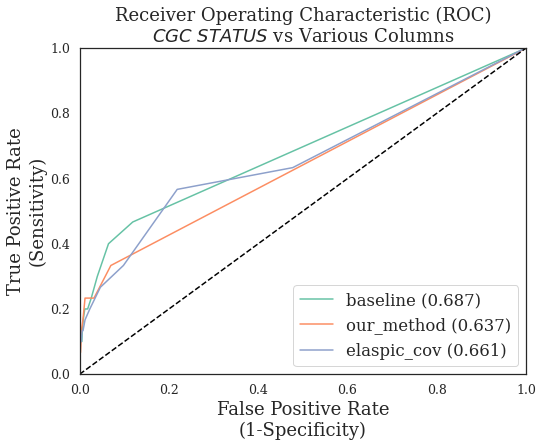

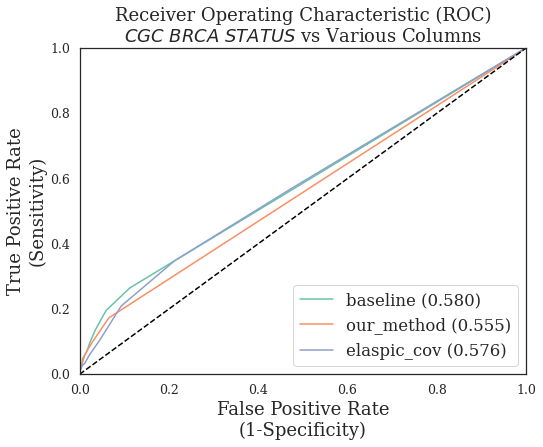

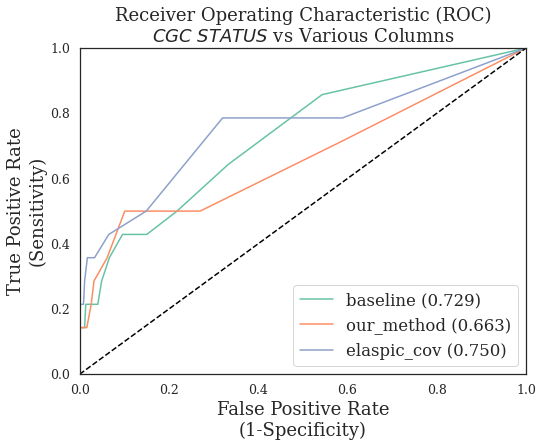

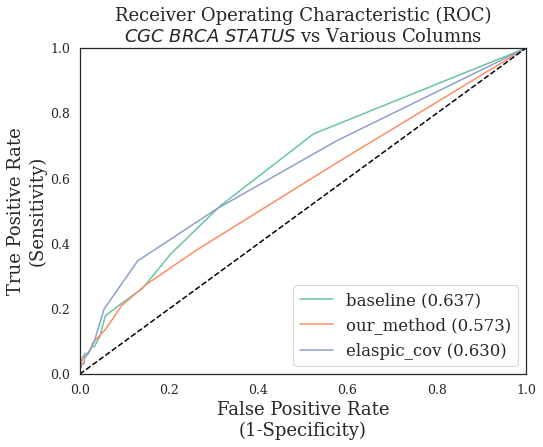

In [28]:
predator_analysis.run_roc_curve_analysis(
    preliminary_data_name="brca_preliminary_data",
    state_variables=["CGC_STATUS", "CGC_STATUS (BRCA)"]  # <--- change column names
)

In [31]:
len(predator_analysis.data_materials['cgc_all_genes'])

36

n=50, good
n=10, good

maybe more hyper tuning could help?

**LATER**

Run the experiments with CGC as well.